> Many machine learning algorithms are sensitive to the scale and magnitude of the features.

> In linear models, as well as
algorithms that depend on distance calculations, such as clustering and principal
component analysis, features with bigger value ranges tend to dominate over features with
smaller ranges. Thus, having features within a similar scale allows us to compare feature
importance, and also helps algorithms converge faster, thus improving performance and
training times.

- Standardizing the features
- Performing mean normalization
- Scaling to the maximum and minimum values
- Implementing maximum absolute scaling
- Scaling with the median and quantiles
- Scaling to vector unit length

## Standardizing the features


_Standardization is the process of centering the variable at zero and standardizing the variable variance to 1._

> 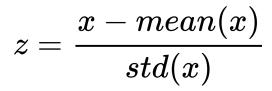
- We've to apply this formula to each of the observation in data.
- This transformation is termed as Z-Score
- **The value of this transformation tells us how many std deviations a particular obervation deviates from the mean.**

In [2]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [3]:
boston = load_boston()

In [4]:
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
data_boston['MEDV'] = boston.target

In [5]:
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Dividing the data into train & test sets
x_train, x_test, y_train, y_test = train_test_split(data_boston.drop(labels='MEDV', axis=1), data_boston['MEDV'], 
                                                    test_size=0.3, random_state=0)

In [7]:
# Let's set up the standard scalar transformer
std_scalar = StandardScaler()
std_scalar.fit(x_train)

StandardScaler()

In [11]:
# Standardizing the variables with the trained std_scalar, trained on training set.
x_train_scaled = std_scalar.transform(x_train)
x_test_scaled = std_scalar.transform(x_test)

_Returns Numpy arrays_

In [13]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [14]:
x_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.207356,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073
1,-0.388865,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430
2,-0.335735,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367
3,-0.394852,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896
4,-0.391456,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,-0.368566,-0.499979,-0.529609,-0.263603,-0.546603,-0.856509,0.189506,0.464292,-0.502683,-0.673799,0.507076,0.357058,-0.099123
350,-0.392217,1.405216,-1.093761,-0.263603,-1.031715,1.240447,-1.524854,1.316070,-0.502683,-0.022204,-1.473421,0.349573,-1.353990
351,-0.384504,-0.499979,-0.153031,-0.263603,-0.078816,-0.410014,0.485947,-0.491616,-0.387206,0.177384,-0.303127,0.396590,-0.302844
352,-0.375118,-0.499979,-0.596907,-0.263603,-0.936425,-0.397176,0.589523,0.933261,-0.733637,-0.990791,-0.258116,0.375888,0.899677


**_StandardScaler() stores the mean and standard deviation that were learned
from the train set variables in its `mean_` and `scale_` attributes. Let's visualize the
learned parameters._**

In [15]:
std_scalar.mean_, std_scalar.scale_

(array([3.35828432e+00, 1.18093220e+01, 1.10787571e+01, 6.49717514e-02,
        5.56098305e-01, 6.30842655e+00, 6.89940678e+01, 3.76245876e+00,
        9.35310734e+00, 4.01782486e+02, 1.84734463e+01, 3.60601186e+02,
        1.24406497e+01]),
 array([8.34141658e+00, 2.36196246e+01, 6.98393565e+00, 2.46476009e-01,
        1.15437239e-01, 7.01016354e-01, 2.79987983e+01, 2.06473886e+00,
        8.65974217e+00, 1.70351284e+02, 2.22166426e+00, 8.55009244e+01,
        7.06848020e+00]))

## Performing mean normalization


In mean normalization, we center the variable at zero and rescale the distribution to the
value range, instead of the std dev.

> 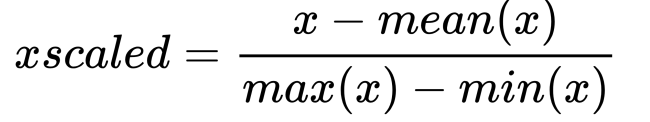
- This transformation results in a distribution centered at 0, with its minimum and maximum
values within the range of -1 to 1.

In [20]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

In [21]:
boston = load_boston()

In [22]:
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
data_boston['MEDV'] = boston.target

In [23]:
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
# Splitting the train & test sets
x_train, x_test, y_train, y_test = train_test_split(data_boston.drop(labels='MEDV', axis=1), data_boston['MEDV'], 
                                                    test_size=0.3, random_state=0)

In [25]:
# Let's set up the scalaers
# Just like previously, we'll set the StandardScalar() but without std dev bcz we're using range this time
# That's why we've imported RobustScalar

In [26]:
std_scalar = StandardScaler(with_mean=True, with_std=False)

**let's set up the RobustScaler() from scikit-learn so that it does not
remove the median from the values but divides them by the value range**

In [27]:
scalar_MinMax = RobustScaler(with_centering=False, with_scaling=True, quantile_range=(0,100))

In [28]:
# Let's fit the scalars on the train set so they learn the mean, min, max for each feature

In [29]:
std_scalar.fit(x_train)
scalar_MinMax.fit(x_train)

RobustScaler(quantile_range=(0, 100), with_centering=False)

In [30]:
# Let's Normalize the data by transformation
x_train_scaled = scalar_MinMax.transform(std_scalar.transform(x_train))
x_test_scaled = scalar_MinMax.transform(std_scalar.transform(x_test))   # returns numpy arrays

Note how we transform the data with StandardScaler() to remove the mean and then
transform the resulting NumPy array with RobustScaler() to divide the result by the
range between the minimum and maximum values.

## Scaling to the maximum and minimum values

Scaling to the minimum and maximum values squeezes the values of the variables between
0 and 1. To implement this scaling technique, we need to subtract the minimum value from
all the observations and divide the result by the value range

> 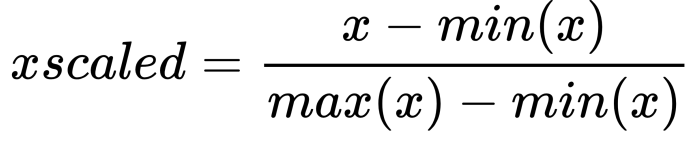

In [32]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [33]:
boston = load_boston()
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
data_boston['MEDV'] = boston.target

In [34]:
# Splitting the train & test sets
x_train, x_test, y_train, y_test = train_test_split(data_boston.drop(labels='MEDV', axis=1), data_boston['MEDV'], 
                                                    test_size=0.3, random_state=0)

In [35]:
minMax_scalar = MinMaxScaler()

In [36]:
minMax_scalar.fit(x_train)

MinMaxScaler()

In [37]:
x_train_scaled = minMax_scalar.transform(x_train)
x_test_scaled = minMax_scalar.transform(x_test)  # returns Numpy arrys

In [43]:
# Let's see the values of the parameter learned by MinMaxScalar
minMax_scalar.data_max_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [44]:
minMax_scalar.data_min_

array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1742e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00])

In [45]:
minMax_scalar.data_range_

array([8.896988e+01, 1.000000e+02, 2.728000e+01, 1.000000e+00,
       4.860000e-01, 5.219000e+00, 9.710000e+01, 1.095230e+01,
       2.300000e+01, 5.240000e+02, 9.400000e+00, 3.965800e+02,
       3.525000e+01])

## Scaling to vector unit length


When scaling to vector unit length, we transform the components of a feature vector so that
the transformed vector has a length of 1, or in other words, a norm of 1. 

A feature vector contains the
values of each variable for a single observation. When scaling to vector unit length, we
divide each feature vector by its norm.

**Norm:** Norm of a Vector means it's length.
- There are two types of norms
- Manhattan Distance (**Norm l1**): Sum of Absolute components of a vector
> 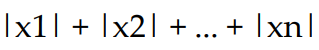
- Euclidean Distance (**Norm l2**):Square Root of the squares of the components of a vector
> 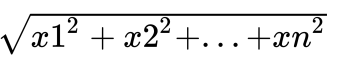

In [46]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [47]:
boston = load_boston()
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
data_boston['MEDV'] = boston.target

In [48]:
# Splitting the train & test sets
x_train, x_test, y_train, y_test = train_test_split(data_boston.drop(labels='MEDV', axis=1), data_boston['MEDV'], 
                                                    test_size=0.3, random_state=0)

In [50]:
# Let's set up the Normalizer() from scikit-learn to scale each observation to the Manhattan distance or norm l1
scalar = Normalizer(norm='l1')   # Default is Eucildean Distance or norm l2

In [51]:
scalar.fit(x_train)

Normalizer(norm='l1')

The fit() method of Normalizer() does nothing, as this normalization
procedure depends exclusively on the values of the features for each
observation. No parameters need to be learned from the train set.


In [52]:
x_train_scaled = scalar.transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [60]:
# We can calculate the length of each feature vector by np.linalg()
np.round(np.linalg.norm(x=x_train_scaled, ord=1, axis=1), 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [59]:
# We can see that each observation/feature vector has a norm of 1
x_train_scaled.shape, np.round(np.linalg.norm(x=x_train_scaled, ord=1, axis=1), 1).shape

((354, 13), (354,))

In [61]:
# Comparing the output with unscaled data and it'll blow your minds
np.round(np.linalg.norm(x=x_train, ord=1, axis=1), 1)

array([1024.1,  744. , 1003.5,  858. ,  732.4,  859.3,  845.9,  847. ,
        888.1,  826.7,  705.9,  808.9,  734. ,  784.6,  785.1,  819.6,
       1212.9, 1258. ,  757.6, 1223. , 1236.1,  890.2, 1166.8, 1270. ,
        919. ,  925.9, 1197. ,  770.3, 1118. ,  886.7,  719. ,  952. ,
        933.4,  745. ,  805.6,  825.1,  678.5,  947.7,  910. ,  816. ,
        769.1,  832.4,  763.5,  777. ,  850.4, 1137.7,  802.1,  703.4,
        802.6,  688. ,  801.8,  877.3,  753.8,  912.4,  936.7,  813.6,
       1194. ,  771.9,  739.5,  825.9,  890.8,  891.6,  844.4,  927.1,
        998.6,  903.3, 1250.3,  739.5, 1095.3,  857.7,  834.8,  738.4,
        855.1, 1238.4,  828.6,  958.4,  775. ,  923.4,  859.6,  830.7,
        782.3,  796.8,  953.2,  857.9, 1249.9,  716.7,  803.9,  978.8,
       1186.9,  904. , 1238.2,  981.6,  884.9,  924.9,  694.1,  725.2,
        832.4,  717.7,  917. , 1263.9,  836.7,  813.5,  992.5,  823.4,
       1224.3,  712.1,  841.2,  950.3,  702.6,  791.9,  830.4,  742.1,
      